In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_california_housing

In [8]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns = cal_housing.feature_names)
y = cal_housing.target


In [10]:
X_scale = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_scale

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [30]:

coef_list = []
l2_model = Ridge(alpha=1)
#lets tune alfpha
alpha = 1E-5
for i in range(10):
    l2_model.alpha=alpha
    new_a = l2_model.fit(X_scale,y)
    coef_list.append(new_a.coef_)
    alpha = alpha*1000

In [31]:
coef_list

[array([ 0.8296193 ,  0.11875165, -0.26552688,  0.30569623, -0.004503  ,
        -0.03932627, -0.89988565, -0.870541  ]),
 array([ 0.82961904,  0.1187523 , -0.26552558,  0.30569451, -0.00450277,
        -0.0393263 , -0.89987946, -0.87053475]),
 array([ 0.8293461 ,  0.11939823, -0.26422311,  0.30398067, -0.00427544,
        -0.03936068, -0.8937389 , -0.86433656]),
 array([ 0.52632452,  0.11975532,  0.03494657, -0.01933297,  0.00138676,
        -0.02573968, -0.1619308 , -0.12171367]),
 array([ 1.63516638e-03,  2.51492095e-04,  3.60383399e-04, -1.11334302e-04,
        -5.84579058e-05, -5.64763452e-05, -3.42662296e-04, -1.09763209e-04]),
 array([ 1.63879046e-06,  2.51564036e-07,  3.61894910e-07, -1.11227086e-07,
        -5.87080818e-08, -5.65355226e-08, -3.43346970e-07, -1.09479332e-07]),
 array([ 1.63879410e-09,  2.51564107e-10,  3.61896427e-10, -1.11226977e-10,
        -5.87083326e-11, -5.65355818e-11, -3.43347657e-10, -1.09479047e-10]),
 array([ 1.63879410e-12,  2.51564107e-13,  3.61896

Text(0.5, 1.0, 'Coef of Alpha for L2')

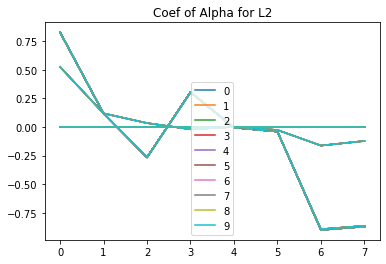

In [32]:
for i in range(len(coef_list)):

    for j in coef_list:
#        fig, ax = plt.subplots()
        plt.plot(coef_list[i])
plt.legend(range(len(coef_list)))
plt.title("Coef of Alpha for L2")
